In [1]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


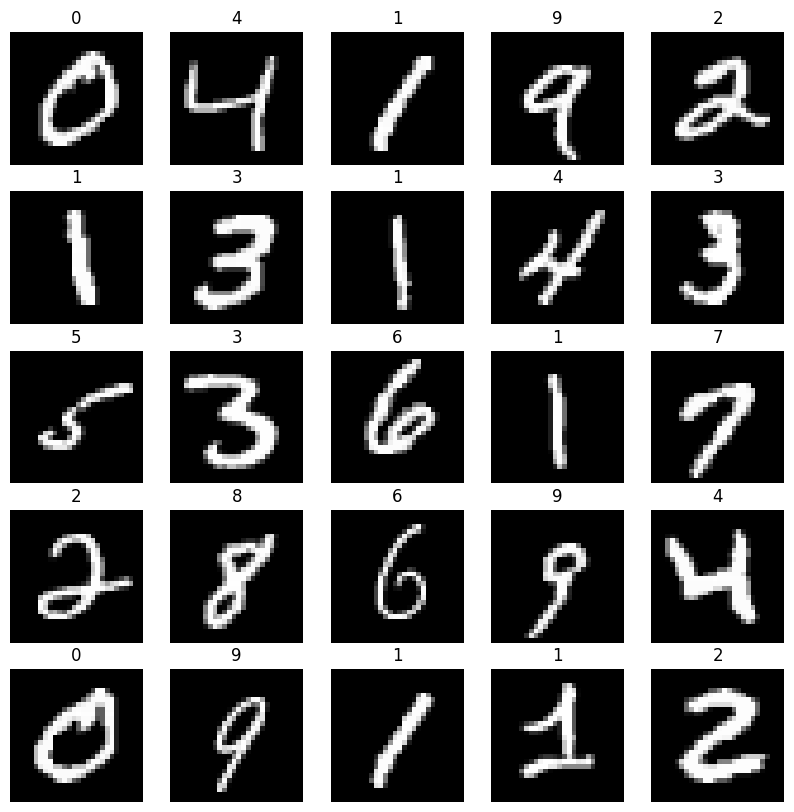

In [5]:
plt.figure(figsize = (10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i],cmap = 'gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [6]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
input_shape = (28,28,1)
num_classes = 10
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32,kernel_size = (3,3),activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(num_classes,activation='softmax')
    ]
)

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
keras.utils.plot_model(model,to_file='MNIST_CNN.png',show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [17]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)   

In [18]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7932 - loss: 2.1144 - val_accuracy: 0.9668 - val_loss: 0.1315
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9679 - loss: 0.1144 - val_accuracy: 0.9767 - val_loss: 0.0877
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9808 - loss: 0.0620 - val_accuracy: 0.9797 - val_loss: 0.0807
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9788 - val_loss: 0.0800
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9840 - val_loss: 0.0640
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9865 - val_loss: 0.0617
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9951 - loss: 0.0137 - val_accuracy: 0.9872 - val_loss: 0.0578
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9960 - loss: 0

In [19]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0531 


[0.04253118112683296, 0.9883999824523926]